<a href="https://colab.research.google.com/github/zualexander/mai-aiapp-computer-vision/blob/main/mai_computer_vision_experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tarfile
import os
import splitfolders
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#Functions

In [ ]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
def plot_accuracy_and_loss(history):

  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

# Download Dataset
from [howto](https://towardsdatascience.com/an-informative-colab-guide-to-load-image-datasets-from-github-kaggle-and-local-machine-75cae89ffa1e)

In [ ]:
!wget --no-check-certificate \
    ""http://aisdatasets.informatik.uni-freiburg.de/freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz"" \
    -O "/tmp/dataset.tar.gz"

--2022-05-25 19:50:19--  http://aisdatasets.informatik.uni-freiburg.de/freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz
Resolving aisdatasets.informatik.uni-freiburg.de (aisdatasets.informatik.uni-freiburg.de)... 132.230.105.132
Connecting to aisdatasets.informatik.uni-freiburg.de (aisdatasets.informatik.uni-freiburg.de)|132.230.105.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 541562880 (516M) [application/x-gzip]
Saving to: ‘/tmp/dataset.tar.gz’

/tmp/dataset.tar.gz 100%[===================>] 516.47M  14.8MB/s    in 37s     

2022-05-25 19:50:57 (13.9 MB/s) - ‘/tmp/dataset.tar.gz’ saved [541562880/541562880]



In [ ]:
!mkdir /tmp/dataset 
!tar xf /tmp/dataset.tar.gz --directory=/tmp/dataset

# Datasplit

In [ ]:
splitfolders.ratio("/tmp/dataset/images", output="/tmp/dataset/output",
    seed=1337, ratio=(.75, .25), group_prefix=None, move=False)

Copying files: 4947 files [00:02, 2422.99 files/s]


In [ ]:
ls /tmp/dataset/output/train

BEANS/   CHIPS/      FISH/   JUICE/  PASTA/   SUGAR/         WATER/
CAKE/    CHOCOLATE/  FLOUR/  MILK/   RICE/    TEA/
CANDY/   COFFEE/     HONEY/  NUTS/   SODA/    TOMATO_SAUCE/
CEREAL/  CORN/       JAM/    OIL/    SPICES/  VINEGAR/


In [ ]:
train = keras.utils.image_dataset_from_directory(
    directory='/tmp/dataset/output/train/',
    labels='inferred',
    label_mode='categorical',
    crop_to_aspect_ratio=True,
    batch_size=32,
    image_size=(256, 256))

validation = keras.utils.image_dataset_from_directory(
    directory='/tmp/dataset/output/val/',
    labels='inferred',
    label_mode='categorical',
    crop_to_aspect_ratio=True,
    batch_size=32,
    image_size=(256, 256))


Found 3699 files belonging to 25 classes.
Found 1248 files belonging to 25 classes.


In [ ]:
print(len(train.class_names))

25


# Model

In [ ]:
resnet_model = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(256, 256, 3),
    pooling=None,
    classes=len(train.class_names)
) 

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model = keras.models.Sequential()

for layer in resnet_model.layers:
        layer.trainable=False

model.add(resnet_model)

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(len(train.class_names), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dense_1 (Dense)             (None, 25)                12825     
                                                                 
Total params: 90,709,913
Trainable params: 67,122,201
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
#compile model
model.compile(
  optimizer=keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

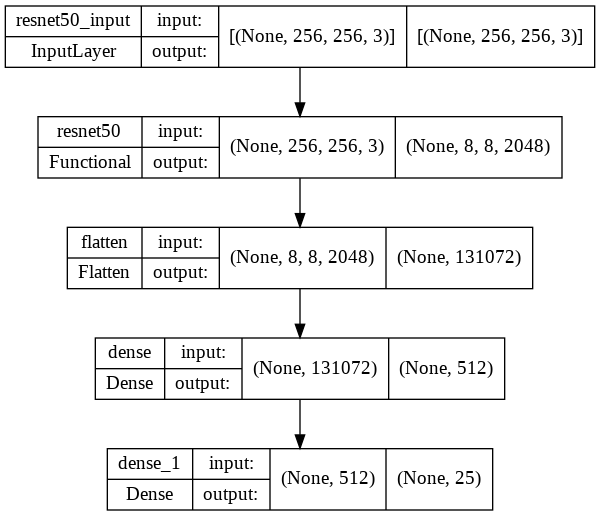

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

In [ ]:
hist = model.fit(train, validation_data=validation, epochs=20)

Epoch 1/20
116/116 [==============================] - 32s 151ms/step - loss: 14.6454 - acc: 0.3474
Epoch 2/20
116/116 [==============================] - 17s 144ms/step - loss: 0.8692 - acc: 0.7497
Epoch 3/20
116/116 [==============================] - 18s 148ms/step - loss: 0.3503 - acc: 0.8967
Epoch 4/20
116/116 [==============================] - 18s 146ms/step - loss: 0.1291 - acc: 0.9589
Epoch 5/20
116/116 [==============================] - 18s 151ms/step - loss: 0.0497 - acc: 0.9862
Epoch 6/20
116/116 [==============================] - 18s 145ms/step - loss: 0.0189 - acc: 0.9962
Epoch 7/20
116/116 [==============================] - 18s 146ms/step - loss: 0.0131 - acc: 0.9973
Epoch 8/20
116/116 [==============================] - 18s 146ms/step - loss: 0.0045 - acc: 0.9992
Epoch 9/20
116/116 [==============================] - 18s 146ms/step - loss: 0.0017 - acc: 1.0000
Epoch 10/20
116/116 [==============================] - 18s 147ms/step - loss: 3.5528e-04 - acc: 1.0000
Epoch 11/20
11

#Model evaluation

## validation scoring

In [ ]:
#evaluate on unseen data
score = model.evaluate(validation, verbose=0)

In [ ]:
print('Test accuracy:', score[1])

Test accuracy: 0.6955128312110901


In [ ]:
print('Test loss:', score[0])

Test loss: 1.862662434577942


##trainigs history

dict_keys(['loss', 'acc'])


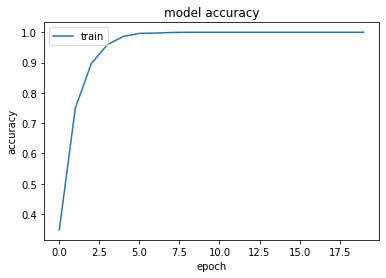

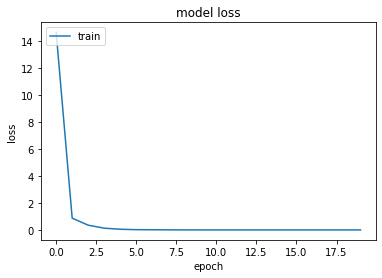

In [ ]:
print(hist.history.keys())
plot_accuracy_and_loss(hist)